In [ ]:
'''
Name: Achintya Kamath
Roll Number: R030
MBA Tech Artificial Intelligence
Computer Vision Experiment 1 : To highlight the edges of the given image and to draw Histogram of orientation.
18th July 20224
'''

In [71]:
# Importing things #
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 
from skimage import data

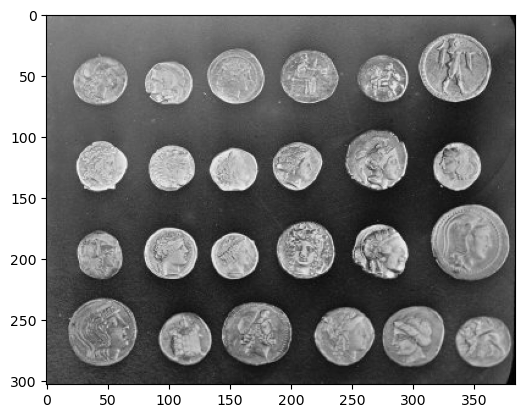

In [72]:
# Selecting and Displaying the image #
image = data.coins()
[rw,col] = image.shape
plt.imshow(image, cmap='gray')

In [83]:
# Applying Sobel Filters for X and Y #
diffx = cv.Sobel(image, ddepth=cv.CV_32F, dx=1, dy=0, ksize=3)
diffy = cv.Sobel(image, ddepth=cv.CV_32F, dx=0, dy=1, ksize=3)

# Finding Absolute Values For Reasons #
abs_diffx = cv.convertScaleAbs(diffx)
abs_diffy = cv.convertScaleAbs(diffy)

In [84]:
print(" Absolute Values Of X:\n", abs_diffx, "\n\n Absolute Values Of Y:\n", abs_diffy)
print("\n X Minimum:", np.min(abs_diffx), "\n X Maximum:", np.max(abs_diffx))
print("\n Y Minimum:", np.min(abs_diffy), "\n Y Maximum:", np.max(abs_diffy))

 Absolute Values Of X:
 [[  0 255  10 ...  28  14   0]
 [  0 207   4 ...  50  11   0]
 [  0  88   2 ... 115   1   0]
 ...
 [  0  43  39 ...  24   6   0]
 [  0  58  44 ...   8  10   0]
 [  0  74  52 ...   2  12   0]] 

 Absolute Values Of Y:
 [[  0   0   0 ...   0   0   0]
 [206 137  62 ...  18   1   2]
 [ 60  10  36 ...  41   7  16]
 ...
 [ 12  13  17 ...   2   6   8]
 [ 20   4  20 ...   2  10  12]
 [  0   0   0 ...   0   0   0]]

 X Minimum: 0 
 X Maximum: 255

 Y Minimum: 0 
 Y Maximum: 255


Text(0.5, 1.0, 'Absolute Y')

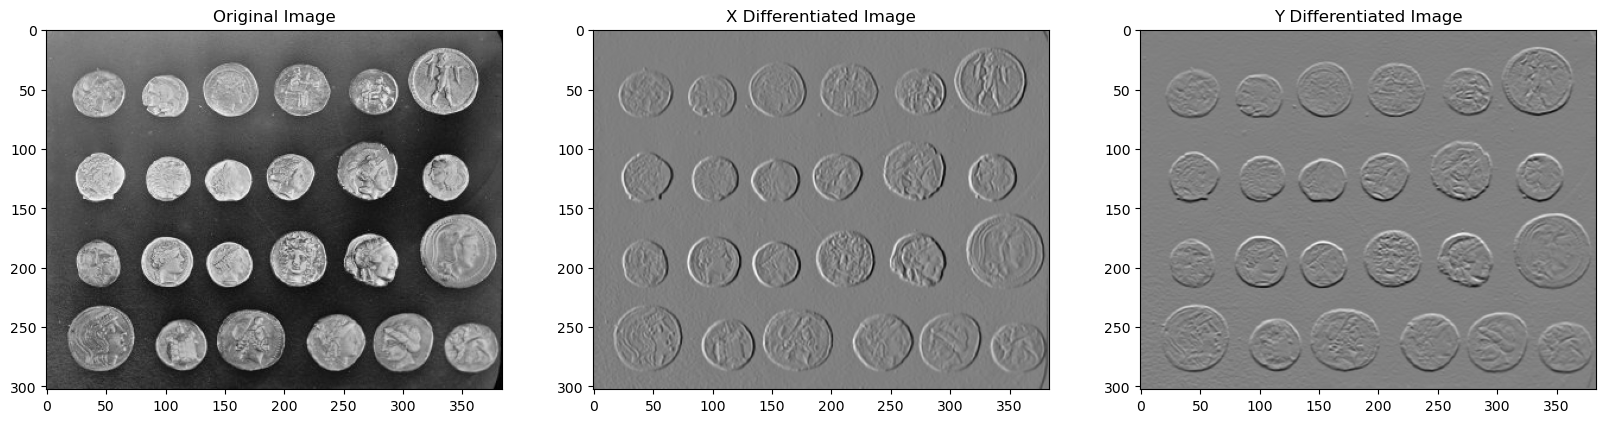

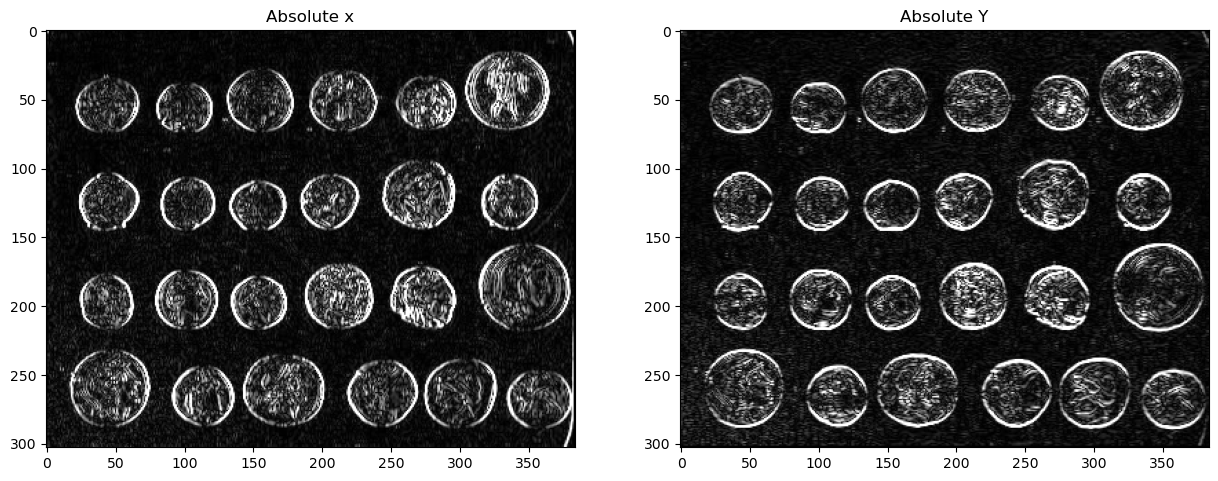

In [85]:
# Ploting the stuff #
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(diffx, cmap='gray')
plt.title("X Differentiated Image")

plt.subplot(1,3,3)
plt.imshow(diffy, cmap='gray')
plt.title("Y Differentiated Image")

# Ploting Absolutes #
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(abs_diffx, cmap='gray')
plt.title("Absolute x")

plt.subplot(1,2,2)
plt.imshow(abs_diffy, cmap='gray')
plt.title("Absolute Y")

In [86]:
'''
Useful Info.
Here, 
DiffX shows vertical gradients because differential along X axis results in Vertical Gradients being left untouched.
DiffY shows horizontal gradients because differential along Y axis results in Horizontal Gradients being left untouched.
'''

# Calculating Magnitudes and Angles #
magi = np.sqrt((diffx**2) + (diffy**2))
angle = (np.arctan2(diffy, diffx)*180/np.pi) %180 # converting radians to degrees

'''
Magnitudes will give the defined edges of a particular object,
Angles are supposed to give the orientation of the object with respect to a particular edge (if it exists otherwise it doesn't matter)
In this instance, the orientation of the coins is irrelevant.
'''

"\nMagnitudes will give the defined edges of a particular object,\nAngles are supposed to give the orientation of the object with respect to a particular edge (if it exists otherwise it doesn't matter)\nIn this instance, the orientation of the coins is irrelevant.\n"

Text(0.5, 1.0, 'Angles/Orientations')

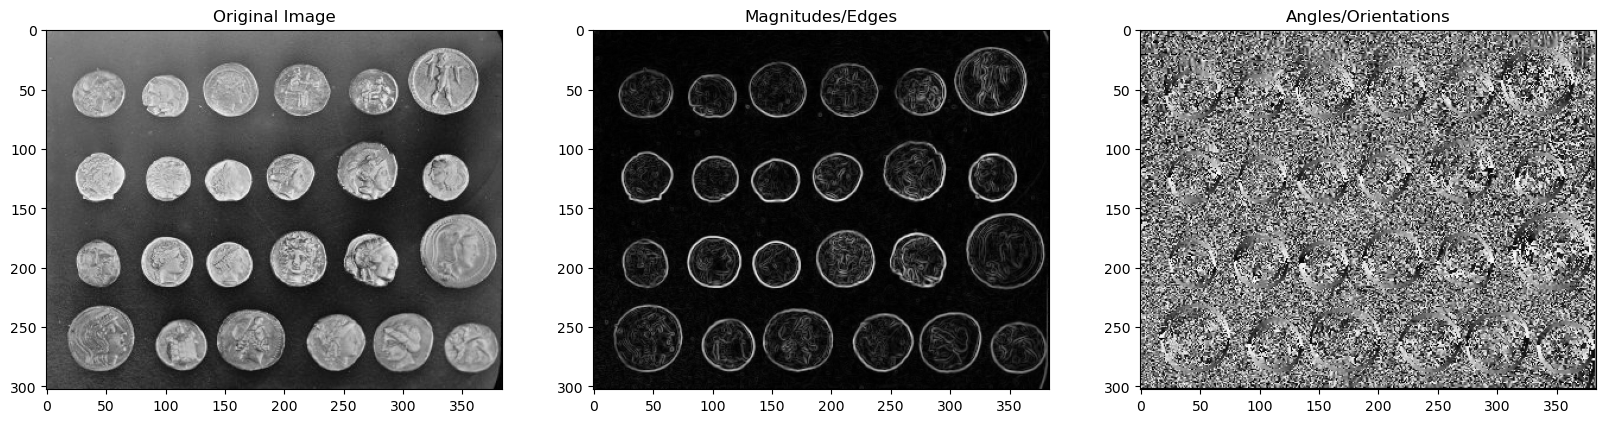

In [87]:
# Ploting the stuff #
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(magi, cmap='gray')
plt.title("Magnitudes/Edges")

plt.subplot(1,3,3)
plt.imshow(angle, cmap='gray')
plt.title("Angles/Orientations")

In [89]:
# Ploting Histogram of Angle and Thresholding the Magnitudes#
angle1D = np.reshape(angle, (rw*col, 1))
magi_thresh = magi
thresh = int(200)

In [90]:
for row in range(rw):
    for col in range(col):
        if magi[row,col]>200:
            magi_thresh[row,col] = 255
        else:
            magi_thresh[row,col] = 0

Text(0.5, 1.0, 'Histogram of Angles/Orientation')

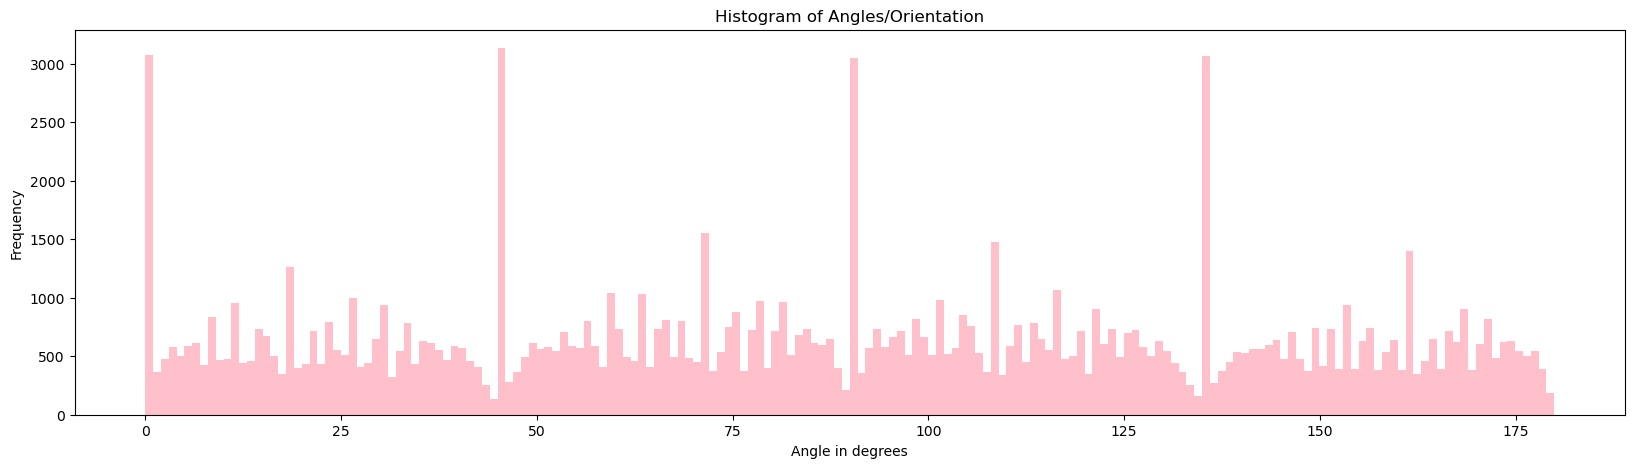

In [95]:
plt.figure(figsize=(20,5))
plt.hist(angle1D, bins=180, color="pink")
plt.xlabel("Angle in degrees")
plt.ylabel("Frequency")
plt.title("Histogram of Angles/Orientation")
#plt.xticks(np.arange(0, 200, 1))
#plt.yticks(np.arange(0, 200, 1))

In [97]:
# Filter size 7 #
# Applying Sobel Filters for X and Y #
diffx = cv.Sobel(image, ddepth=cv.CV_32F, dx=1, dy=0, ksize=7)
diffy = cv.Sobel(image, ddepth=cv.CV_32F, dx=0, dy=1, ksize=7)

# Finding Absolute Values For Reasons #
abs_diffx = cv.convertScaleAbs(diffx)
abs_diffy = cv.convertScaleAbs(diffy)

Text(0.5, 1.0, 'Absolute Y')

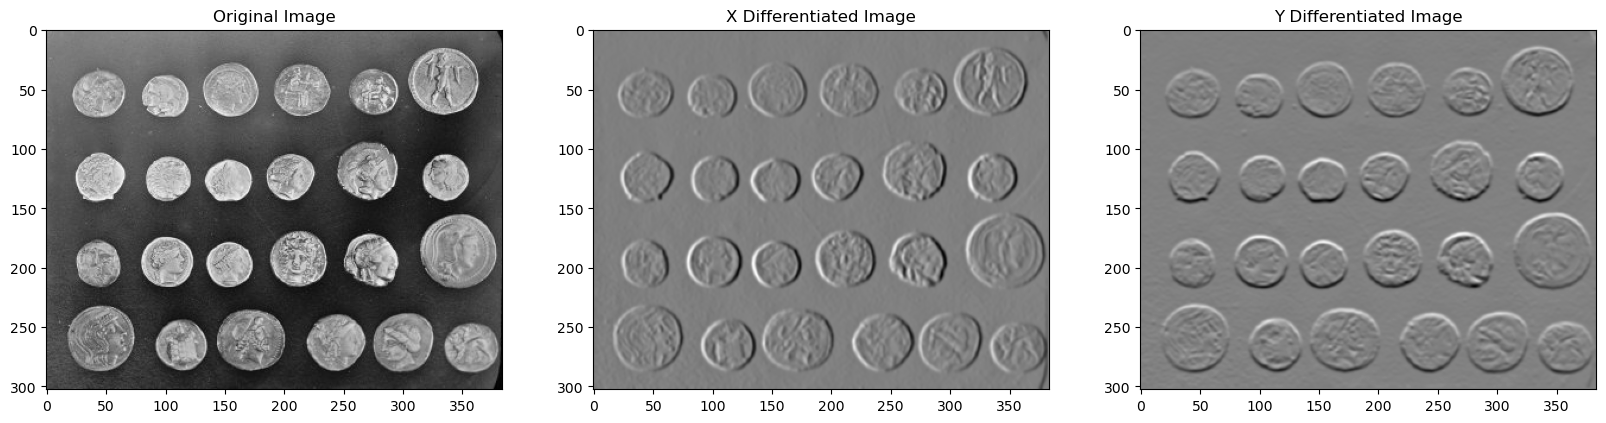

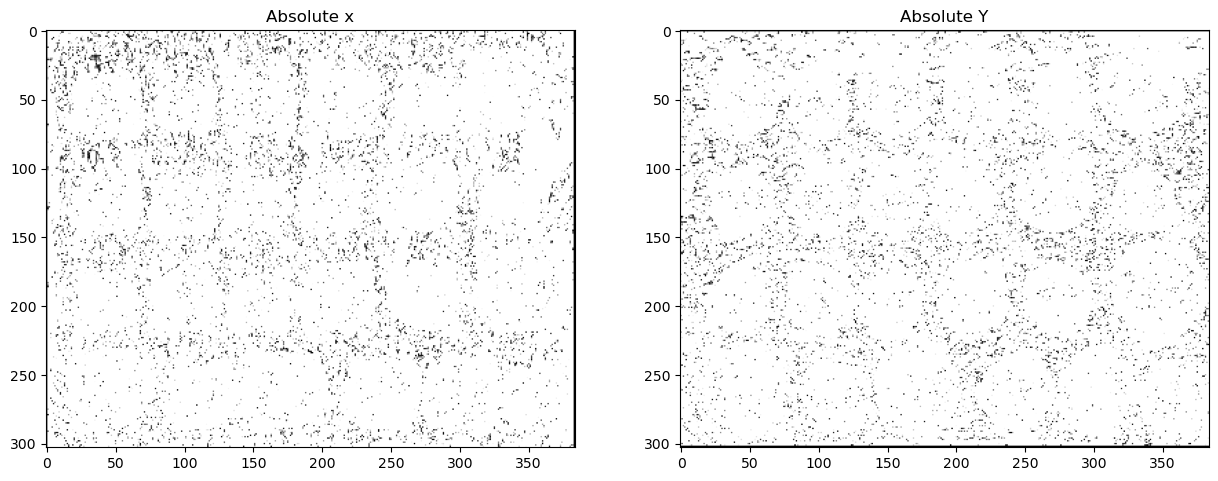

In [98]:
# Ploting the stuff #
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1,3,2)
plt.imshow(diffx, cmap='gray')
plt.title("X Differentiated Image")

plt.subplot(1,3,3)
plt.imshow(diffy, cmap='gray')
plt.title("Y Differentiated Image")

# Ploting Absolutes #
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(abs_diffx, cmap='gray')
plt.title("Absolute x")

plt.subplot(1,2,2)
plt.imshow(abs_diffy, cmap='gray')
plt.title("Absolute Y")

In [ ]:
'''
Conclusion:

First.
Sobel Filter is used to find the edges present in all directions.
Histogram of orientation shows that maximum pixels, which are lying on the edges have angles [0, 45, 90, 135] (approximately). 
This shows that the given image has strong edges in these directions with respect to the Vertical Axis.
[Lines on X are vertical]

Second.
If sobel filter size is increased from 3x3 to 5x5 or larger the finer details from the images disappears which leads to blurring of the final edges of the image.
'''